<a href="https://colab.research.google.com/github/BLOSSOM1994/Tree_maskRcnn/blob/master/Tree_classification_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Idea is to apply CNN to tree&Any Image Classification dataset.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image
from zipfile import ZipFile 

In [2]:
# importing libraries for Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Split into train, validate and test data folders
datadir='/content/drive/My Drive/Colab Notebooks'
train_dir  = datadir+'/CNN_test/train'
test_dir   = datadir+'/CNN_test/test'


train_dir_tree = train_dir + '/tree'
train_dir_any = train_dir + '/any'
test_dir_tree = test_dir + '/tree'
test_dir_any = test_dir + '/any'



In [5]:
print('number of tree training images - ',len(os.listdir(train_dir_tree)))
print('number of any training images - ',len(os.listdir(train_dir_any)))
print('number of tree testing images - ',len(os.listdir(test_dir_tree)))
print('number of any testing images - ',len(os.listdir(test_dir_any)))

number of tree training images -  163
number of any training images -  77
number of tree testing images -  117
number of any testing images -  56


Now we need to convert the RGB images into array of numbers. The requirement can be satisfied by ImageDataGenerator() https://keras.io/preprocessing/image/

In [6]:
data_generator = ImageDataGenerator(rescale = 1.0/255.0, zoom_range = 0.2)

In [7]:
batch_size = 32
training_data = data_generator.flow_from_directory(directory = train_dir,
                                                   target_size = (64, 64),
                                                   batch_size = batch_size,
                                                   class_mode = 'binary')
testing_data = data_generator.flow_from_directory(directory = test_dir,
                                                  target_size = (64, 64),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary')

Found 240 images belonging to 2 classes.
Found 173 images belonging to 2 classes.


In [8]:
# preparing the layers in the Convolutional Deep Neural Network
model = Sequential()

#Convolutional Layer 1 w/ Pooling
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = training_data.image_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.3))

#Convolutional Layer 2 w/ Pooling
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))

#Convolutional Layer 3 w/ Pooling
model.add(Conv2D(filters = 126, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.15))

#Fully Connected Layer w/ Dropout
model.add(Flatten())
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(rate = 0.15))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.1))

#Output Layer
model.add(Dense(units = len(set(training_data.classes)), activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 126)       7

In [10]:
fitted_model = model.fit_generator(training_data,
                        steps_per_epoch = int(239/batch_size),
                        epochs = 25,
                        validation_data = testing_data,
                        validation_steps = int(173/batch_size))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
7/7 [==============================] - 265s 38s/step - loss: 0.6704 - accuracy: 0.6518 - val_loss: 0.6557 - val_accuracy: 0.6750
Epoch 2/25
7/7 [==============================] - 21s 3s/step - loss: 0.6520 - accuracy: 0.6741 - val_loss: 0.6624 - val_accuracy: 0.6750
Epoch 3/25
7/7 [==============================] - 21s 3s/step - loss: 0.6178 - accuracy: 0.7115 - val_loss: 0.6209 - val_accuracy: 0.6875
Epoch 4/25
7/7 [==============================] - 24s 3s/step - loss: 0.6159 - accuracy: 0.6652 - val_loss: 0.6419 - val_accuracy: 0.6750
Epoch 5/25
7/7 [==============================] - 21s 3s/step - loss: 0.5836 - accuracy: 0.6696 - val_loss: 0.5502 - val_accuracy: 0.6812
Epoch 6/25
7/7 [==============================] - 21s 3s/step - loss: 0.4846 - accuracy: 0.6875 - val_loss: 0.5001 - val_accuracy: 0.6750
Epoch 7/25
7/7 [==============================] - 21s 3s/step - loss: 0.4162 - accuracy: 0.745

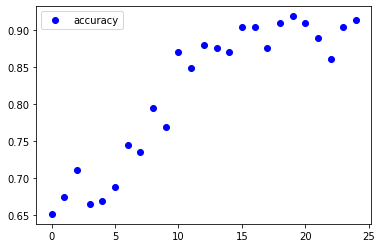

In [11]:
# plotting accuracy and validation accuracy
accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'bo', label = 'accuracy')
plt.legend()

In [18]:
# parse file
hist_dict = fitted_model.history

In [20]:
#hist_dict=eval(hist_dict)
for metric in hist_dict:
    print(metric)

loss
accuracy
val_loss
val_accuracy


In [28]:
def plot_training(metric):
    fig=plt.figure()
    plt.plot(hist_dict[metric], c='blue')
    plt.plot(hist_dict['val_'+metric], c='red')
    plt.title('model '+metric)
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()

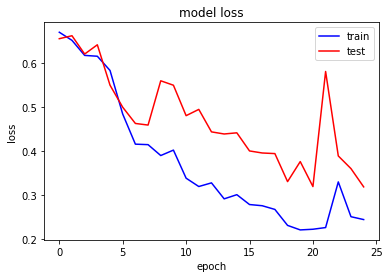

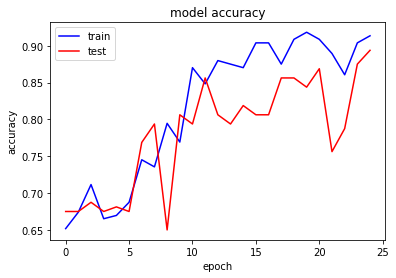

In [29]:
plot_training('loss')
#plot_training('val_loss')
plot_training('accuracy')

In [12]:
# testing the model
def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(x = test_image)
    print(result)
    if result[0][0]  == 1:
        prediction = 'Any'
    else:
        prediction = 'Tree'
    return prediction

In [13]:
print(testing_image(test_dir + '/any/donmy.JPG'))

[[0. 1.]]
Tree


In [14]:
print(testing_image(test_dir + '/any/glio.JPG'))

[[1. 0.]]
Any


In [15]:
print(testing_image(test_dir + '/any/IMG_4753 - Copy.JPG'))
#123.JPG
#IMG_4796.JPG
#5567.JPG
#IMG_4753 - Copy.JPG
#jhkuyi.JPG

[[1. 0.]]
Any
